# Sistemas de Colas
En los modelos clásicos de colas de espera, cada dispositivo relevante del sistema computaciona será considerado como un servidor que recibe trabajos y los procesa. Eventualmente puede haber mas de un  servidor atendiendo la cola.

<img src="SistemaColas.png" width="500">

### Estructura Básica de un sistema de colas
(i) Modelos de Llegadas: 

* Determinista ($D$); $\tau_i$ fijos
* Proceso de Poisson ($M$) Llegadas aleatorias según el patrón siguiente:

    Sea $n(T)$ el número de llegadas en el intervao $T$
    $$P[n(T)=i] =\frac{(\lambda T)^i e^{-\lambda T}}{i!}$$
* Proceso Erlang de k etapas $(E_k)$
* Distribución general $G$
* Distribución general Independiente $GI$

(ii) Modelos de Servicio: 

* Determinista ($D$); $s$ fijos
* Proceso Exponencial ($M$) Tiempos de servicio aleatorios según el patrón siguiente:
    $$F_s(t)= P[s \leq t] = 1-  e^{-\lambda t}$$
* Proceso Hiperexponencial parámetro k $(E_k)$
* Distribución general $G$
* Distribución general Independiente $GI$

(iii) Disciplina de la cola:

* FCFS (First Coming First Served) El primer trabajo que llega es el primero en ser procesado. 
* LCFS (Last Coming First Served) El último trabajo que llega es el primero en ser procesado. Esto puede ocurrir de varios modos:
    - Con desalojo: se detiene el proceso actual y comienza a ser procesado el trabajo que acaba de llegar. Para el proceso interrumpido existen dos formas de operar: iniciar el proceso desde el comienzo o bien guardar una copia del estado actual para continuar desde ahi cuando se desocupe el servidor.
    - Sin desalojo: se espera al término del proceso actual para iniciar el servicio del trabajo que acaba de llegar.
* PS (Procesor Sharing) Procesamiento compartido.
* IS (Infinite server) Servidor Infinito: Cada vez que llega un trabajo, se genera una "copia" del servidor de manera que hay infinitos servidores. 

(iv) Notación de Kendall: $A/B/c/k/m$, en que:
* A distribución de llegadas
* B Distribución de tiempos de servicio
* c Número de servidores
* k Capacidad de la cola
* m Tamaño de la población

### Algunas medidas de desempeño y relaciones simples
**(a) Intensidad de tráfico $I$:**
    $$ I = \frac{E(s)}{E(\tau)} = \frac{\frac{1}{\mu}}{\frac{1}{\lambda}} = \frac{\lambda}{\mu}$$
**(b)Factor de Utilización $U$:**
$$U = min\left \{\frac{\lambda}{c\mu},1\right\}$$
con $c$ número de servidores en paralelo con tasa de proceso $\mu$.
Normalmente se cumple $\lambda < c\mu$, si no el sistema está saturado.

**(c) Productividad $X$:**
$$ X = \frac{cU}{E(s)} = min \{\lambda, c\mu\}$$
$X$ es igual a $\lambda$ mientras $\lambda \leq \mu$, en caso contrario se alcanza el valor de saturación.

**(d) Tiempo medio de respuesta $R$:**
$$R = E(q) + E(s)$$
con $E(q)$ tiempo medio de espera y $E(s)$ tiempo medio de servicio

**(e) Longitud de la cola $N_q(t)$:**
$$N_q(t) = max\{0,N(t) -c\}$$
donde $N(t)$ es el número de trabajos en el sistema en el tiempo $t$

**(f) Percentiles de tiempo de espera y de tiempo de respuesta:**

$\pi_r(p)$: percentil $p$ del tiempo de respuesta $r$: $$\pi_r(p) = x \Leftrightarrow P(r \leq x) =p$$
una fracción $p$ de los trabajos pasan menos de $\pi_r(p)$ unidades de tiempo en el sistema.

$\pi_q(p)$: percentil $p$ del tiempo de espera $q$: $$\pi_q(p) = x \Leftrightarrow P(q \leq x) =p$$
una fracción $p$ de los trabajos esperan menos de $\pi_q(p)$ unidades de tiempo en la cola de espera.
  
**Equilibrio del sistema**  
El estado de un sistema de colas está definido por la longitud de sus colas. Cuando un sistema comienza a funcionar, durante un tiempo su desempeño depende fuertemente de :
* las condiciones iniciales
* tiempo que lleva el sistema en operación

En tal caso se dice que el sistema está en un estado *transiente*. Si a medida que el tiempo transcurre, la influencia de las condiciones iniciales tiene a desaparecer de manera que el desempeño del sistema se independiente de ellas, se dice que el sistema entra en estado estable o de *equilibrio*. Si el sistema està en equilibrio, el tiempo $t$ no determina el estado del sistema y se tiene:
$$N = N_q + N_s$$
en que $N$, $N_q$ y $N_s$ son v.a. discretas y entonces se define:
$$L \equiv E(N) = E(N_q) + E(N_s) \equiv L_q + L_s$$

Además se satisface

**Ley de Little**

Cuando un sistema se encuentra en el equilibrio se cumple:
$$ L = \lambda R$$
$$ L_q = \lambda E(q)$$

Este resultado mas las relaciones:
$$ R = E(s) + E(q)$$
$$L = L_q + L_s$$

permiten calcular cualquiera de las cuatro medidas de desempeño $R$, $E(q)$, $L$, $L_q$ a partir del valor de una de ellas (suponiendo que $\lambda$ y $E(s)$ son conocidos).

### Proceso de Poisson y algunas distribuciones asociadas
**(i) Distribución Exponencial**
Se usa habitualmente para representar tiempos entre eventos o tiempos de servicio.
* Función de Distribución:
$$F_X(x) = P(X \leq x) = 1 - e^{-ax} \qquad \forall x \geq 0$$ 


* Función de densidad de probabilidad:
$$f_X(x) = a e^{-ax}$$


* Esperanza de X:
$$ E(X) = \int_0^{\infty} x f_X(x) dx = \int_0^{\infty} ax e^{-ax} dx $$

Integrando por partes con $u=x$ y $v= -e^{-ax}$ se tiene:
$$E(X) = x e^{-ax}{\bracevert_0^{\infty}} + \int_0^{\infty} e^{-ax} dx =  \left(-\frac{1}{a}\right)e^{-ax}{\bracevert_0^{\infty}} = \frac{1}{a}$$

* Varianza de X:
$$V(X) \equiv E[(X-E(X))^2] = E(X^2) - [E(X)]^2 = \frac{1}{a^2}$$


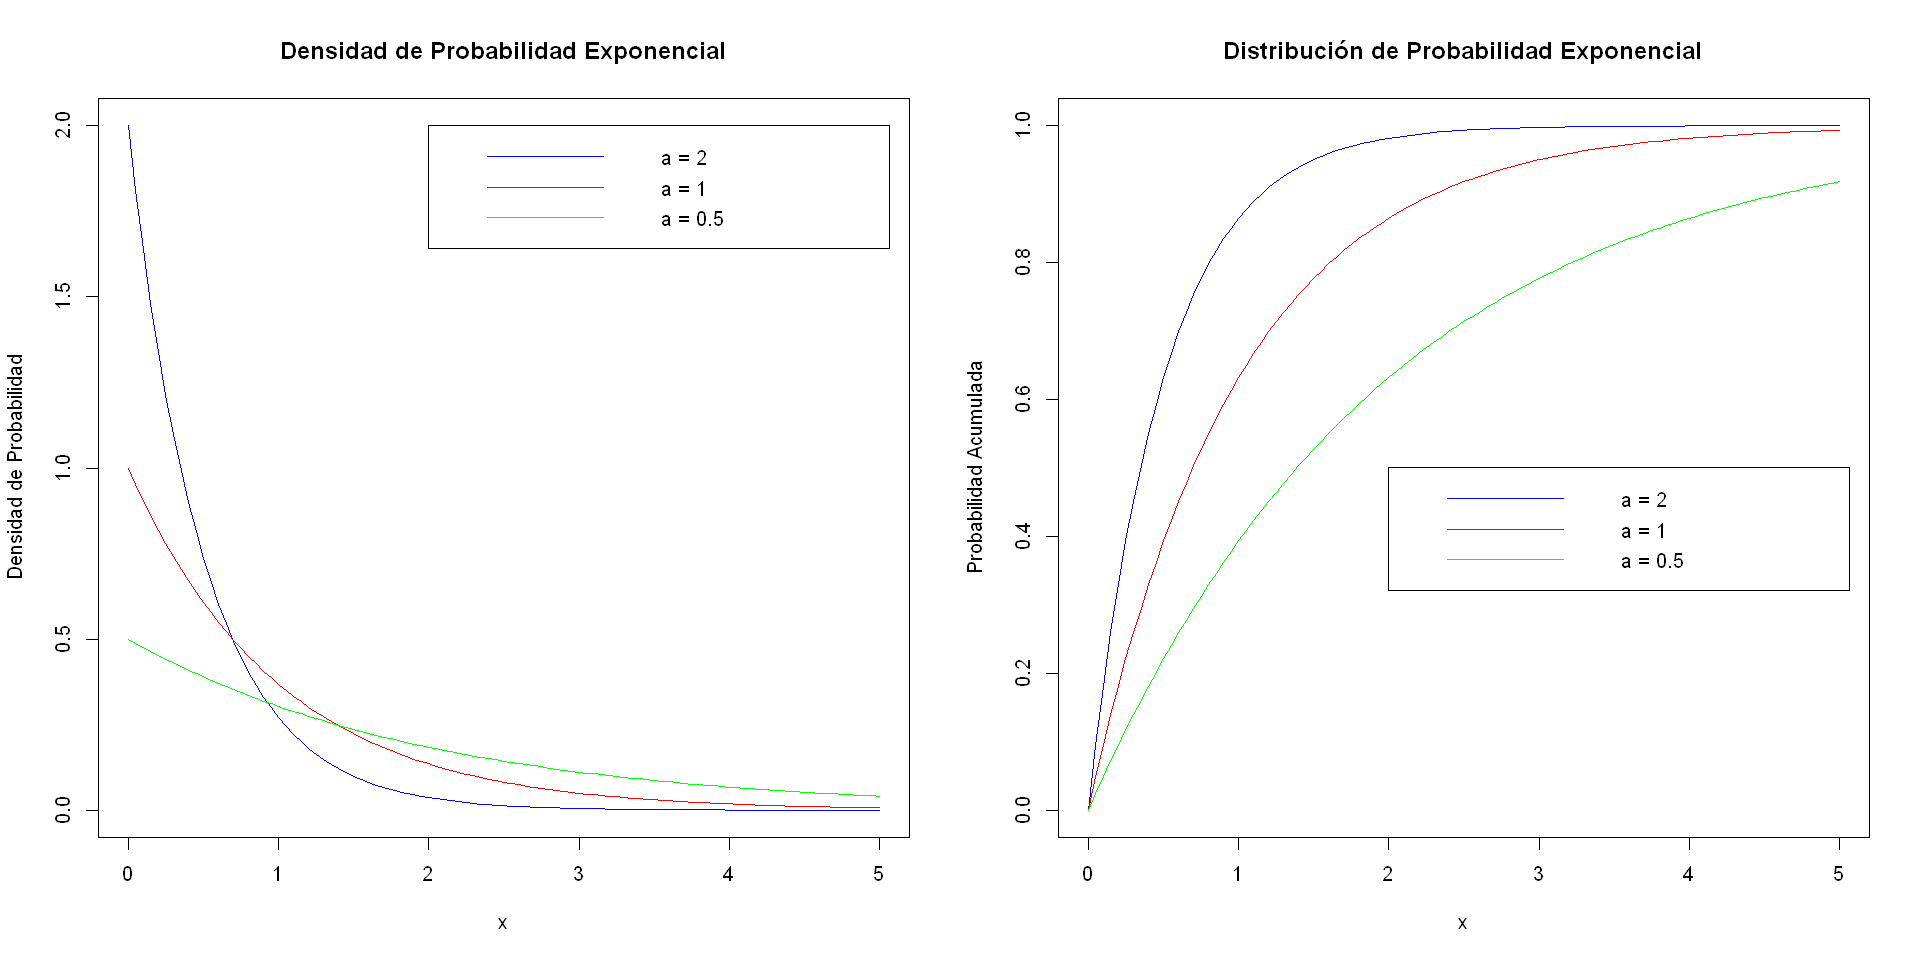

In [1]:
#simulación de distribución exponencial
options(repr.plot.width=16, repr.plot.height=8)
vec <- seq(0,5,by=0.05)
par(mfrow=c(1,2))
plot(vec,dexp(vec,2),type="l", col="blue",xlab="x", ylab= "Densidad de Probabilidad", main = "Densidad de Probabilidad Exponencial")
lines(vec,dexp(vec,1),col="red")
lines(vec,dexp(vec,0.5),col="green")
legend(2, 2, legend=c("a = 2", "a = 1", "a = 0.5"),col=c("blue","red","green"), lty=c(1,1,1))

plot(vec,pexp(vec,2),type="l", col="blue",xlab="x", ylab= "Probabilidad Acumulada", main = "Distribución de Probabilidad Exponencial")
lines(vec,pexp(vec,1),col="red")
lines(vec,pexp(vec,0.5),col="green")
legend(2, 0.5, legend=c("a = 2", "a = 1", "a = 0.5"),col=c("blue","red","green"), lty=c(1,1,1))

**Propiedad Sin Memoria**

$$P(X\leq x+t \mid X>t ) = P(X\leq x)$$

**Demostración**


$$P(X\leq x+t \mid X>t ) = \frac{P(X\leq x+t \wedge X>t ) }{P(X>t )} = \frac{F_X(x+t) -F_X(t)}{1-F_X(t)}\qquad\qquad\qquad \qquad \qquad \qquad$$

$$\qquad \qquad = \frac{1-e^{-a(x+t)} - (1 - e^{-at})}{1 - (1-e^{-at})} = \frac{e^{-at}(1- e^{-ax})}{e^{-at}}= F_X(x) = P(X \leq x)$$




**(ii) Proceso de Poisson**

Un proceso estocástico es una familia de v.a. 
$$\{X(t), t \in T\}$$
Cuando las v.a. toman sólo valores enteros, decimos que es un proceso puntual y se nota:
$$\{N(t), t \in T\}$$

El **Proceso de Poisson** es un proceso puntual que permite modelar la ocurrencia de eventos en un intervalo de tiempo de largo t y cumple lo siguiente:

**(a)** La probabilidad de un evento en $(t,t+\Delta t)$ es $a\Delta t + o(\Delta t)$

**(b)** La probabilidad de ocurrencias en $(t,t+\Delta t)$ es independiente de lo ocurrido en el proceso antes de t

**(c)** La probabilidad de mas de un evento en $(t,t+\Delta t)$  es $o(\Delta t)$.

Bajo tales hipótesis, sea $N(t) =$ Número de eventos en el intervalo $(0,t)$, entonces se puede demostrar que $N(t)$ se distribuye según la ley de Poisson de media $at$, es decir:
$$P(N(t) = n) = \frac{(at)^n e^{-at}}{n!}, \qquad \qquad n =0,1,2,...$$



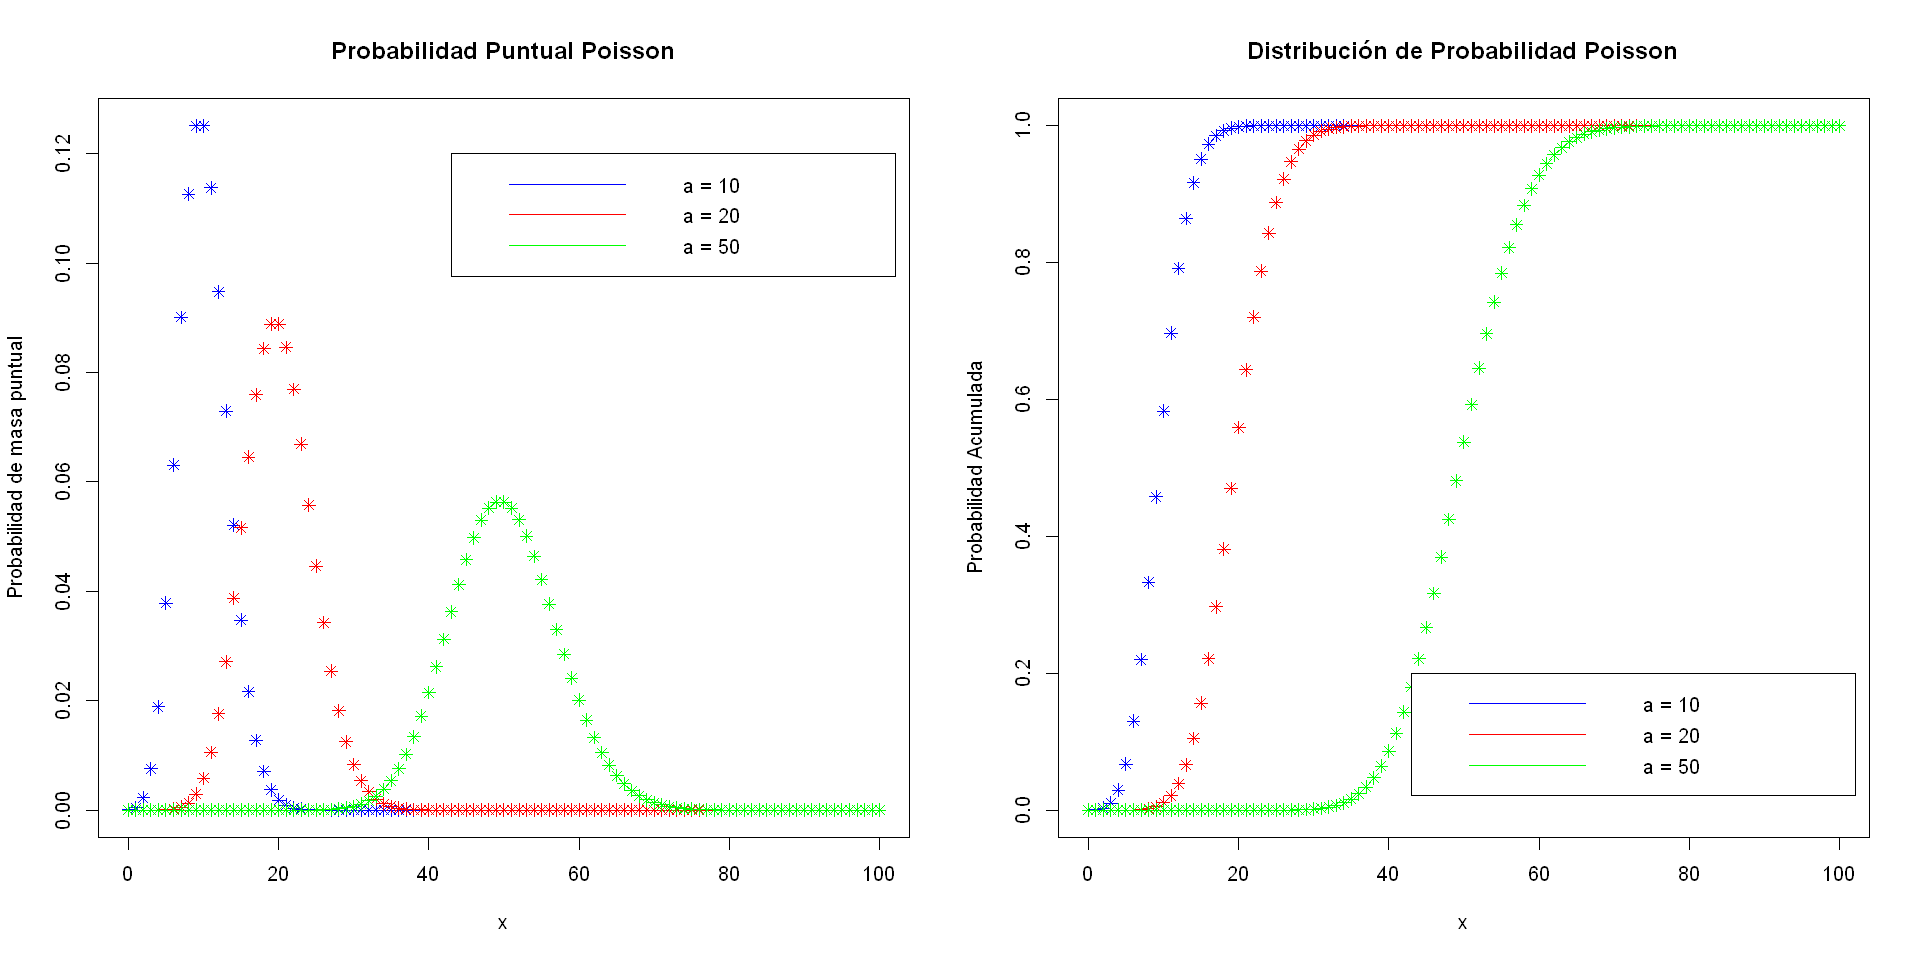

In [24]:
#simulación de distribución Poisson
options(repr.plot.width=16, repr.plot.height=8)
vec <- seq(0,100,by=1)
par(mfrow=c(1,2))
plot(vec,dpois(vec,10),type="p",pch=8, col="blue",xlab="x", ylab= "Probabilidad de masa puntual", main = "Probabilidad Puntual Poisson")
points(vec,dpois(vec,20),pch=8,col="red")
points(vec,dpois(vec,50),pch=8, col="green")
legend(43,0.12, legend=c("a = 10", "a = 20", "a = 50"),col=c("blue","red","green"), lty=c(1,1,1))

plot(vec,ppois(vec,10),type="p",pch=8,  col="blue",xlab="x", ylab= "Probabilidad Acumulada", main = "Distribución de Probabilidad Poisson")
points(vec,ppois(vec,20),pch=8, col="red")
points(vec,ppois(vec,50),pch=8, col="green")
legend(43, 0.2, legend=c("a = 10", "a = 20", "a = 50"),col=c("blue","red","green"), lty=c(1,1,1))

**Lema:** Si $\{N(t), t \in T\}$ es un proceso de Poisson, entonces los tiempos entre eventos se distribuyen según una ley exponencial

**Demostración:**
Para mostrar el lema, comenzamos por recordar las siguientes definiciones para una variable aleatoria continua con densidad de probabilidad en el interrvalo $[0,\infty]$:

$$S_X(x) = 1- F_X(x) = P(X>x) \qquad \qquad \text{Función de Supervivencia}$$

$$ h_X(x) = -\frac{d}{dx}(ln S_X(x)) \qquad \qquad \text{Función de Azar}$$

Notar que se cumplen las siguientes relaciones:
$$\begin{eqnarray}
S_X(x) & = & exp\left\{ -\int_0^x h(u)du \right\}\\
&&\\
f_X(x) & = & -\frac{d}{dx}(S_X(x))  = h(x) exp\left\{ -\int_0^x h(u)du \right\}\\
\end{eqnarray}$$
De manera que la distribución de probabilidad de $X$ se define de manera única, conociendo cualquiera de las cuatro funciones $F_X, f_X, h_X$ o $S_X$.

Además:
$$\begin{eqnarray}
h_X(x) & = & -\frac{S'_X(x)}{S_X(x))}\\
& = & \lim_{\Delta x \to 0^+} 
\frac{P(X>x) - P(X>x+\Delta x)}{\Delta x} \frac{1}{P(X>x)}\\
& = & \lim_{\Delta x \to 0^+} 
\frac{P(x < X < x+\Delta x)}{\Delta x} \frac{1}{P(X>x)}\\
\end{eqnarray}$$



Por otra parte en el caso en que $X \sim \text{Exponencial}(a)$ , se tiene:

$$\begin{eqnarray}
S_X(x) & =& P(X>x) = 1 - P (X\leq x) = 1- (1- e^{-ax}) = e^{-ax}\\
&&\\
\implies ln S_X(x) & = & -ax\\
&&\\
\implies h_x(x) & = & a\\
\end{eqnarray}$$

con lo cual nos reencontramos con la propiedad de independencia del pasado para v.a. exponenciales y de la unicidad comentada previamente, se tiene:

$$h_X(x) = a \iff X \sim \text{Exponencial}(a)$$

Por otra parte, en general se tiene que:
$$\begin{eqnarray}
h_X(x) & = & -\frac{S'_X(x)}{S_X(x))}\\
& = & \lim_{\Delta x \to 0^+} 
\frac{P(X>x) - P(X>x+\Delta x)}{\Delta x} \frac{1}{P(X>x)}\\
& = & \lim_{\Delta x \to 0^+} 
\frac{P(x < X < x+\Delta x)}{\Delta x} \frac{1}{P(X>x)}\\
\end{eqnarray}$$


Ahora bien, de su definición, tenemos que para los tiempos entre eventos $\tau$ en un proceso de Poisson se cumple:
$$\begin{eqnarray}
h_{\tau}(t) & = & \lim_{\Delta t \to 0^+} 
\frac{P(t < \tau < t+\Delta t)}{\Delta t} \frac{1}{P(\tau>t)}\\
&&\\
& = & \lim_{\Delta t \to 0^+} 
\frac{P(\text{un evento en}(t, t+\Delta t) \text{ y } \tau>t)}{\Delta t} \frac{1}{P(\tau>t)}\\
&&\\
 & = & \lim_{\Delta t \to 0^+} 
\frac{P(\text{un evento en}(t, t+\Delta t))}{\Delta t} \frac{P(\tau>t)}{P(\tau>t)}\\
&&\\
 & = & \lim_{\Delta t \to 0^+} 
\frac{a\Delta t + o(\Delta t)}{\Delta t} = a
\end{eqnarray}$$

Por lo tanto $\tau$ se distribuye Exponencial de tasa $a$.

**Algunas Propiedades**
\begin{eqnarray}
E(N(t)) & = & \sum_{n=0}^{\infty} n P(N(t)=n) = \sum_{n=1}^{\infty} n \frac{(at)^n e^{-at}}{n!}\\
&&\\
& = & (at) \sum_{n=1}^{\infty} \frac{(at)^{n-1} e^{-at}}{(n-1)!}
= (at) \sum_{n=0}^{\infty} \frac{(at)^{n} e^{-at}}{n!} = at\\
\end{eqnarray}

$$Var(N(t)) = E(N(t)^2) - (E(N(t))^2 = at$$
En efecto:

\begin{eqnarray}
E(N(t)^2) & = & \sum_{n=0}^{\infty} n^2 P(N(t)=n) = \sum_{n=1}^{\infty} n^2 \frac{(at)^n e^{-at}}{n!}\\
&&\\
& = & \sum_{n=1}^{\infty} n(n-1) \frac{(at)^n e^{-at}}{n!} + \sum_{n=1}^{\infty} n \frac{(at)^n e^{-at}}{n!}\\
&&\\
& = & \sum_{n=2}^{\infty} n(n-1) \frac{(at)^n e^{-at}}{n!} + at\\
&&\\
& = & (at)^2 \sum_{n=2}^{\infty} \frac{(at)^{n-2} e^{-at}}{(n-2)!} + at\\
&&\\
& = & (at)^2 \sum_{n=0}^{\infty} \frac{(at)^{n} e^{-at}}{n!} + at= (at)^2  + at\\
\end{eqnarray}







*Superposición de Llegadas Poisson:* La agregación de procesos Poisson de tasas $a_1,\cdots, a_m$ resulta en un proceso de Poisson de tasa $a_1+\cdots+ a_m$

*Descomposición de Llegadas Poisson:* Un proceso de Poisson de tasa $a$ que se distribuye en $m$ dispositivos con probabilidades $p_1,\cdots, p_m$ resulta en m  procesos de Poisson de tasas $ap_1+\cdots+ ap_m$